In [4]:
# setting up everything
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
import os
from matplotlib import cm

In [5]:
casedate_array = ['20150606','20150609','20150627','20150801','20150829',
    '20160518','20160610','20160611','20160614','20160619','20160625','20160716','20160719','20160720',
    '20160818','20160819','20160830']

# casedate_array = ['20150606','20150609','20150627','20150801']

ncases = len(casedate_array)
nz = 226
nt = 91

tstar = np.zeros((ncases, nt))
h = np.zeros((ncases, nt))
zcb = np.zeros((ncases, nt))
wwml = np.zeros((ncases, nt))
thv = np.zeros((ncases, nt, nz))
ww = np.zeros((ncases, nt, nz))

tplt = 6. + 10.*np.arange(nt)/60.

In [6]:
# f

In [7]:
for icases in np.arange(ncases):
    LASSOPath = 'E:/Data/SGP_LASSO/WRF/sgplassodiagraw3C1.m1.' + casedate_array[icases] + '.000000/raw_model/'
    
    tmp = glob.glob(LASSOPath + 'updraft*.nc')
    filename = tmp[0]

    f = xr.open_dataset(filename)
    
    wwml[icases,:] = f['wwml'].values
    h[icases,:] = f['zmltop'].values
    zcb[icases,:] = f['zcb'].values
    thv[icases,:,:] = f['CSP_TH'].values
    ww[icases,:,:] = f['CSP_W2'].values

In [36]:
wwml_ = np.ma.masked_where(wwml <= 0, wwml)
h_ = np.ma.masked_where(h <= 0, h)
zcb_ = np.ma.masked_where(zcb <= 0, zcb)

tstar_ = 1000.*h_/np.sqrt(wwml_)
tstar_ = tstar_/3600.

TKE_ = 0.5*wwml_

<ipython-input-36-80313fffbbb7>:5: RuntimeWarning: invalid value encountered in sqrt
  tstar_ = 1000.*h_/np.sqrt(wwml_)


In [37]:
z = f['CSP_Z'].values
z = z.mean(axis = 0)

TKE_comp = TKE_.mean(axis = 0)
TKE_comp_std = TKE_.std(axis = 0)

h_comp = h_.mean(axis = 0)
h_comp_std = h_.std(axis = 0)

zcb_comp = zcb_.mean(axis = 0)
zcb_comp_std = zcb_.std(axis = 0)

tstar_comp = tstar_.mean(axis = 0)
tstar_comp_std = tstar_.std(axis = 0)

thv_comp = thv.mean(axis = 0)

ww_comp = ww.mean(axis = 0)

In [38]:
BVF = np.zeros((nt, nz))
for i in np.arange(nt):
    th_tmp = thv_comp[i, :]
    BVF[i, 0:nz - 1] = np.sqrt((9.8/th_tmp[0:nz - 1])*(np.diff(th_tmp)/np.diff(1000.*z)))

<ipython-input-38-61404267d150>:4: RuntimeWarning: divide by zero encountered in true_divide
  BVF[i, 0:nz - 1] = np.sqrt((9.8/th_tmp[0:nz - 1])*(np.diff(th_tmp)/np.diff(1000.*z)))
<ipython-input-38-61404267d150>:4: RuntimeWarning: invalid value encountered in multiply
  BVF[i, 0:nz - 1] = np.sqrt((9.8/th_tmp[0:nz - 1])*(np.diff(th_tmp)/np.diff(1000.*z)))
<ipython-input-38-61404267d150>:4: RuntimeWarning: invalid value encountered in sqrt
  BVF[i, 0:nz - 1] = np.sqrt((9.8/th_tmp[0:nz - 1])*(np.diff(th_tmp)/np.diff(1000.*z)))


In [39]:
BVF.shape

(91, 226)

In [40]:
z.shape

(226,)

### Let's plot

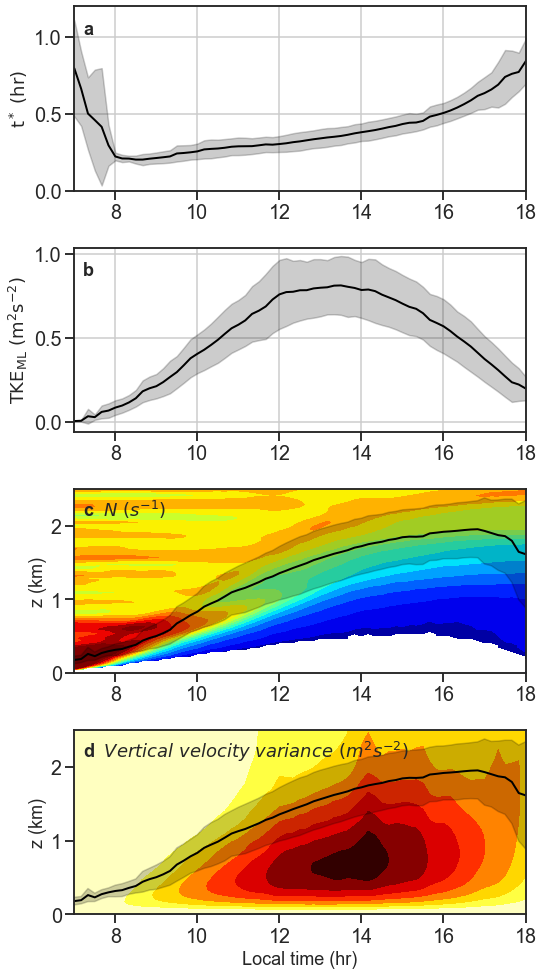

In [41]:
sns.set(context="talk", style="ticks", font_scale=1.2)
myfontsize = 18

fig, axs = plt.subplots(4,1,figsize=[8, 14])

#
x = tplt
y = tstar_comp
yerr = tstar_comp_std

axs[0].plot(x, y, color="black", linewidth=2, label='')
axs[0].fill_between(x, y-yerr, y+yerr, color="black",alpha=0.2)
axs[0].set_ylabel(r"$\mathrm{t^* \ (hr)}$", fontsize=myfontsize)
axs[0].set_xlim((7, 18))
axs[0].set_ylim((0, 1.2))
axs[0].grid(True)

#
y = TKE_comp
yerr = TKE_comp_std

axs[1].plot(x, y, color="black", linewidth=2, label='')
axs[1].fill_between(x, y-yerr, y+yerr, color="black",alpha=0.2)
axs[1].set_ylabel(r"$\mathrm{TKE_{ML} \ (m^2s^{-2})}$", fontsize=myfontsize)
axs[1].set_xlim((7, 18))
# axs[1,0].set_ylim((0, 1.2))
axs[1].grid(True)

#
zplt = z[z < 2.5]

BVF0 = BVF[1:nt - 1, z < 2.5]
BVF_plt = BVF0.T

oax = axs[2].contourf(x[1:nt - 1],zplt,BVF_plt, cmap = cm.jet, levels=np.linspace(0, 0.016, 17), extend = 'max')

# cbar = fig.colorbar(oax, ax=axs[2], orientation='vertical', ticks = [0., 0.008, 0.016], shrink=0.6, pad=0.2)

y = h_comp
yerr = h_comp_std
axs[2].plot(x, y, color="black", linewidth=2, label='')
axs[2].fill_between(x, y-yerr, y+yerr, color="black",alpha=0.2)

axs[2].set_xlim((7, 18))
axs[2].set_ylim((0, 2.5))
axs[2].set_ylabel('z (km)', fontsize=myfontsize)  # Add an x-label to the axes.


#
zplt = z[z < 2.5]

ww_comp_plt = ww_comp[1:nt - 1, z < 2.5]
ww_comp_plt = ww_comp_plt.T

oax = axs[3].contourf(x[1:nt - 1],zplt,ww_comp_plt, cmap = cm.hot_r)

y = h_comp
yerr = h_comp_std
axs[3].plot(x, y, color="black", linewidth=2, label='')
axs[3].fill_between(x, y-yerr, y+yerr, color="black",alpha=0.2)

axs[3].set_xlim((7, 18))
axs[3].set_ylim((0, 2.5))

axs[3].set_ylabel('z (km)', fontsize=myfontsize)  # Add an x-label to the axes.
axs[3].set_xlabel('Local time (hr)', fontsize=myfontsize)  # Add an x-label to the axes.

plt.tight_layout(w_pad=0.01)
# cbar = fig.colorbar(oax,  ax=axs[3], orientation='vertical', ticks = [0., 1.2, 2.4], shrink=0.6, pad=0.3)

for i, label in enumerate(('a', 'b', r"c  $N \ (s^{-1})$", r"d  $Vertical \ velocity \ variance \ (m^2s^{-2})$")):
    axs[i].text(0.02, 0.85, label, transform=axs[i].transAxes,fontsize=myfontsize, fontweight='bold')

fig.savefig('Fig_diurnal_composite_LASSO.png', dpi=fig.dpi, bbox_inches='tight')